In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Get defined company data stock history

In [2]:
def get_ticker_data(ticker):
    """
    Fetch historical stock data for a given ticker symbol.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period="24mo", interval="1d")
    return data

In [3]:
data = get_ticker_data("AAPL")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-03 00:00:00-04:00,191.859062,191.958076,189.859082,190.552155,31458200,0.0,0.0
2023-07-05 00:00:00-04:00,189.670945,191.066956,188.730351,189.433319,46920300,0.0,0.0
2023-07-06 00:00:00-04:00,187.958112,190.116510,187.324457,189.908585,45094300,0.0,0.0
2023-07-07 00:00:00-04:00,189.512539,190.760043,188.354139,188.789764,46778000,0.0,0.0
2023-07-10 00:00:00-04:00,187.383861,188.106636,185.185867,186.740311,59922200,0.0,0.0


# data Visualization

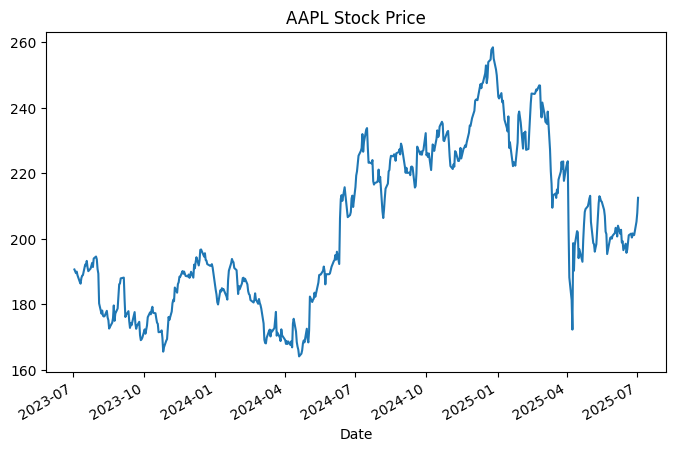

In [4]:
data['Close'].plot(figsize=(8, 5))
plt.title('AAPL Stock Price')
plt.show()

In [5]:
data = data.reset_index()
data['days'] = np.arange(len(data))

# Data split

In [6]:
x = data.drop(columns=['Close','Date'])
y = data['Close']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=False)

In [8]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred_LR = model_LR.predict(x_test)

In [ ]:
y_pred_LR[:-1]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [11]:
mse_LR = mean_squared_error(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f"LinearRegression Mean Squared Error: {mse_LR:.2f}")
print(f"LinearRegression Mean Absolute Error: {mae_LR:.2f}")
print(f"LinearRegression R2 Score: {r2_LR:.2f}")

LinearRegression Mean Squared Error: 2.94
LinearRegression Mean Absolute Error: 1.24
LinearRegression R2 Score: 0.99


In [12]:
model_xgb = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.05,max_depth=5, random_state=42)
model_xgb.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
y_pred_xgb = model_xgb.predict(x_test)

In [14]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Mean Absolute Error: {mae_xgb:.2f}")
print(f"XGBoost R2 Score: {r2_xgb:.2f}")

XGBoost Mean Squared Error: 9.81
XGBoost Mean Absolute Error: 2.22
XGBoost R2 Score: 0.96


In [15]:
joblib.dump(model_xgb, "model_XGB.pkl")

['model_XGB.pkl']

In [16]:
data.shape

(502, 9)

In [17]:
last_row = x.iloc[-1]
future_rows = []
for i in range(1, 8):
    row = last_row.copy()
    row['days'] = len(data) + i - 1
    future_rows.append(row)
future_x = pd.DataFrame(future_rows)
predict_data = model_xgb.predict(future_x)

In [18]:
predict_data

array([212.47435, 212.47435, 212.47435, 212.47435, 212.47435, 212.47435,
       212.47435], dtype=float32)